In [1]:
from experiments_imports import *
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe
warnings.filterwarnings('ignore') # AMI warning
%matplotlib inline

In [2]:
DATA_PATH = os.path.join(os.path.dirname(sktime.__file__),"datasets/data")# "..\data\MTSC")

In [3]:
os.listdir(DATA_PATH)

['ACSF1',
 'Airline',
 'ArrowHead',
 'BasicMotions',
 'GunPoint',
 'Heartbeat',
 'ItalyPowerDemand',
 'JapaneseVowels',
 'Longley',
 'Lynx',
 'OSULeaf',
 'PBS_dataset',
 'PenDigits',
 'PhonemeSpectra',
 'PLAID',
 'ShampooSales',
 'Uschange']

In [11]:
DATASET_NAME = "PenDigits"

In [12]:
read_heartbeat_train, heartbeat_labels_raw = load_from_tsfile_to_dataframe(
    os.path.join(DATA_PATH, f"{DATASET_NAME}/{DATASET_NAME}_TRAIN.ts")
)
read_heartbeat_test, heartbeat_test_labels_raw = load_from_tsfile_to_dataframe(
    os.path.join(DATA_PATH, f"{DATASET_NAME}/{DATASET_NAME}_TEST.ts")
)

In [13]:
def Dataset2Flatten(features, labels):
    return features.agg(lambda x:pd.concat(list(x)), axis=1), pd.factorize(labels)[0]

In [14]:
np.random.seed(44)
random.seed(44)
heartbeat_data,heartbeat_labels_raw = Dataset2Flatten(read_heartbeat_train, heartbeat_labels_raw)
heartbeat_test_data,heartbeat_test_labels_raw = Dataset2Flatten(read_heartbeat_test, heartbeat_test_labels_raw)

In [21]:
heartbeat_test_pca.shape

(3498, 16)

In [22]:
NUMBER_OF_RUNS = 2
result_book_heartbeat = np.zeros((NUMBER_OF_ALGORITHMS,NUMBER_OF_MEASURES_REAL,NUMBER_OF_RUNS))
for i in range(NUMBER_OF_RUNS):
    #Sample and PCA
    selected_digits = [0,1]
    n_pca = 5#(i+1)*5
    heartbeat_pca, heartbeat_labels, heartbeat_raw, ve, pca = import_subset(heartbeat_data, heartbeat_labels_raw, selected_digits, n_pca, -1)
    heartbeat_test_pca, heartbeat_test_labels, heartbeat_test_raw,_,_2 = import_subset(heartbeat_test_data, heartbeat_test_labels_raw, selected_digits, n_pca, -1, pca=pca)
        
    #Run models (outlier rejection: change percent_outliers)
    models, result_book_heartbeat[:,:,i] = run_all(heartbeat_pca, heartbeat_labels, heartbeat_test_pca, heartbeat_test_labels, percent_outliers=0, conf=False, verbose=True, return_results=True)

LDA
N 3498 Accuracy 0.73413 ARI 0.55958 AMI 0.67296
QDA
N 3498 Accuracy 0.87193 ARI 0.75732 AMI 0.80938
RQDA-MCD
RGQDA-MCD
t-QDA
N 3498 Accuracy 0.8665 ARI 0.75738 AMI 0.81261
FEMDA with p/trace
N 3498 Accuracy 0.82133 ARI 0.68889 AMI 0.76635
FEMDA pre-normalised
N 3498 Accuracy 0.8179 ARI 0.67977 AMI 0.76286
LDA
N 3498 Accuracy 0.73413 ARI 0.55958 AMI 0.67296
QDA
N 3498 Accuracy 0.87193 ARI 0.75732 AMI 0.80938
RQDA-MCD
RGQDA-MCD
t-QDA
N 3498 Accuracy 0.8665 ARI 0.75738 AMI 0.81261
FEMDA with p/trace
N 3498 Accuracy 0.82133 ARI 0.68889 AMI 0.76635
FEMDA pre-normalised
N 3498 Accuracy 0.8179 ARI 0.67977 AMI 0.76286


In [9]:
%store -r result_book_heartbeat

Stored 'result_book_heartbeat' (ndarray)


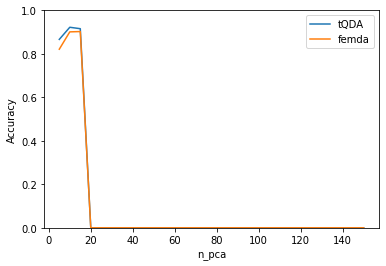

In [16]:
plot_tQDA_vs_FEMDA(result_book_heartbeat, xaxis=5*(np.arange(NUMBER_OF_RUNS)+1), ylim=[0,1])